In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
import folium

In [2]:
dataFilename = 'StopPoints.csv'
bus_stops_data = pd.read_csv(dataFilename, encoding='cp1252')

In [3]:
bus_stops_data.head()

SP_Modification SP_Status  SP_CreationDateTime  SP_RevisionNumber  \
0             new    active  2106-02-07T00:00:00                 11   
1             new    active  2106-02-07T00:00:00                  3   
2             new    active  2106-02-07T00:00:00                  3   
3             new    active  2106-02-07T00:00:00                  5   
4             new    active  2013-11-27T00:00:00                 36   

  SP_ModificationDateTime      AtcoCode  PlateCode CommonName_lang_en  \
0     2016-01-14T18:03:22  7000B6310001   631001.0             Belcoo   
1     2016-07-28T14:56:28  700000000240        NaN  Europa Bus Centre   
2     2016-07-28T15:01:09  700000015363        NaN  Europa Bus Centre   
3     2017-04-04T19:22:07  700000015422        NaN  Europa Bus Centre   
4     2013-11-27T11:55:24  700000014719        NaN  Europa Bus Centre   

  ShortCommonName_lang_en   Street_lang_en    ...     CompassPoint  \
0                  Belcoo              N16    ...               NE   
1       Europa Bus Centre  Glengall Street    ...                E   
2       Europa Bus Centre  Glengall Street    ...                E   
3       Europa Bus Centre              NaN    ...                W   
4                     NaN              NaN    ...              NaN   

  StopAreaRef_Modification StopAreaRef  StopAreaRef_Status  \
0                      new  852G000052              active   
1                      NaN         NaN                 NaN   
2                      NaN         NaN                 NaN   
3                      NaN         NaN                 NaN   
4                      NaN         NaN                 NaN   

        StopAreaRef_CreationDateTime   StopAreaRef_ModificationDateTime  \
0  2017-07-18T14:18:49.9952607+02:00  2017-07-18T14:18:49.9952607+02:00   
1                                NaN                                NaN   
2                                NaN                                NaN   
3                                NaN                                NaN   
4                                NaN                                NaN   

   AdministrativeAreaRef Indicator_lang_en NptgLocalityRef NaptanCode  
0                    700               NaN             NaN        NaN  
1                    700               NaN             NaN        NaN  
2                    700               NaN             NaN        NaN  
3                    700                In             NaN        NaN  
4                    700               NaN             NaN        NaN  

[5 rows x 30 columns]

In [4]:
bus_stops_data.count()

SP_Modification                     19645
SP_Status                           19645
SP_CreationDateTime                 19645
SP_RevisionNumber                   19645
SP_ModificationDateTime             19645
AtcoCode                            19645
PlateCode                           13739
CommonName_lang_en                  19645
ShortCommonName_lang_en             12199
Street_lang_en                       9169
ShortCommonName_lang_ga             12193
LocalityCentre                      19645
GridType                            19644
Easting                             19644
Northing                            19644
Longitude                           19644
Latitude                            19644
StopType                            19645
BusStopType                         13850
TimingStatus                        13850
CompassPoint                         9615
StopAreaRef_Modification            13869
StopAreaRef                         13869
StopAreaRef_Status                

In [5]:
bus_stops_data=bus_stops_data.loc[bus_stops_data['Longitude']<=-5.27]
bus_stops_data=bus_stops_data.loc[bus_stops_data['Longitude']>=-6.50]

bus_stops_data=bus_stops_data.loc[bus_stops_data['Latitude']<=53.42]
bus_stops_data=bus_stops_data.loc[bus_stops_data['Latitude']>=53.23]

bus_stops_data = bus_stops_data.dropna(subset=['Longitude', 'Latitude'])

len(bus_stops_data["Latitude"])

5111

(-6.5, -6.0)

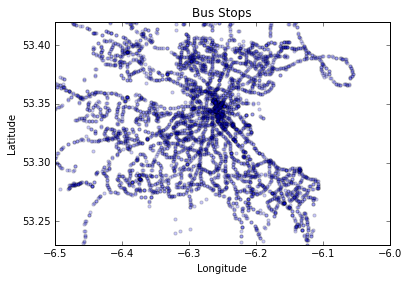

In [6]:
dub_long_border =(-6.50, -6.0)
dub_lat_border =(53.23, 53.42)

bus_stops_data.plot(kind='scatter', x='Longitude', y='Latitude',
                color='blue', alpha=0.2, s=10)
plt.title("Bus Stops")

plt.ylim(dub_lat_border)
plt.xlim(dub_long_border)

In [7]:
bus_stops_data['Latitude3'] = bus_stops_data['Latitude'].apply(lambda x : round(x,3))
bus_stops_data['Longitude3'] = bus_stops_data['Longitude'].apply(lambda x : round(x,3))

In [8]:
dublin_map = folium.Map(location = [53.343817,-6.275367],zoom_start = 11,)

In [9]:
for index, stop_row in bus_stops_data.iterrows():
    folium.CircleMarker([stop_row['Latitude'],stop_row['Longitude']], radius=3, color='blue', fill_opacity=0.9).add_to(dublin_map)



dublin_map

(-6.5, -6.0)

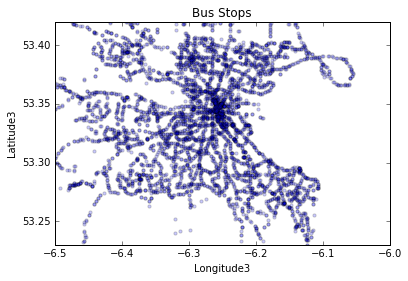

In [10]:
bus_stops_data.plot(kind='scatter', x='Longitude3', y='Latitude3',
                color='blue', alpha=0.2, s=10)
plt.title("Bus Stops")

plt.ylim(dub_lat_border)
plt.xlim(dub_long_border)

In [11]:
dublin3_map = folium.Map(location = [53.343817,-6.275367],zoom_start = 11,)

In [12]:
for index, stop_row in bus_stops_data.iterrows():
    folium.CircleMarker([stop_row['Latitude3'],stop_row['Longitude3']], radius=3, color='blue', fill_opacity=0.9).add_to(dublin3_map)

In [13]:
dublin3_map